In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from typing import Callable, List, Optional, Union
from sklearn.metrics import accuracy_score
from graphviz import Digraph
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import math
import random
from IPython.display import Image
from tqdm import tqdm



from classTree import RandomForest, tree_for_random_forest, categoricalToNum, stats_for_RF, stats

fullDataset = pd.read_csv('diabetes_prediction_dataset.csv')
fullDataset = fullDataset.sample(frac=0.05, random_state=42)

TARGET = 'diabetes'
fullDatasetNorm = fullDataset.copy()
fullDatasetNorm = categoricalToNum(fullDatasetNorm).select_dtypes(include='number')
X_train = fullDatasetNorm.drop(columns=[TARGET])
y_train = fullDatasetNorm[TARGET]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



forest111 = RandomForest()
forest111.fit(X_train, y_train, 1, {'min_usefull': 0.03, 'max_depth' : 10})
y_train_pred = X_train.apply(forest111.predict, axis=1)


In [3]:
stats_for_RF(forest111, X_train, X_test, y_train, y_test, True)

Train Accuracy: 0.953
Test Accuracy: 0.946


(0.953, 0.946)

In [57]:
import sklearn


n_max = 1000
n_min = 100
step = 100


In [58]:
my_train_acc = []
my_test_acc = []

for n_trees in tqdm(range(n_min, n_max, step)):
    forest = RandomForest()
    forest.fit(X_train, y_train, n_trees, {'max_depth' : 3, 'min_usefull': 0.0000000001})
    t_acc, tt_acc = stats_for_RF(forest, X_train, X_test, y_train, y_test)
    my_train_acc.append(t_acc)
    my_test_acc.append(tt_acc)

100%|██████████| 9/9 [35:22<00:00, 235.80s/it]


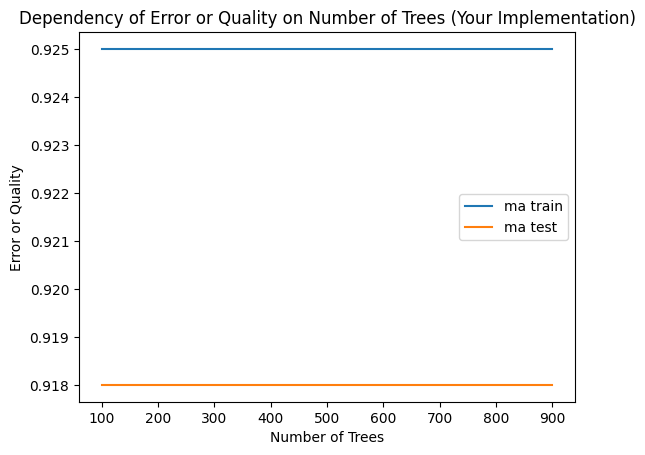

In [59]:
plt.plot(range(n_min, n_max, step), my_train_acc, label='ma train')
plt.plot(range(n_min, n_max, step), my_test_acc, label='ma test')
plt.xlabel('Number of Trees')
plt.ylabel('Error or Quality')
plt.title('Dependency of Error or Quality on Number of Trees (Your Implementation)')
plt.legend()
plt.show()

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
sklearn_train_acc = []
sklearn_test_acc = []
for n_trees in tqdm(range(n_min, n_max, step)):
    forest = RandomForestClassifier(n_estimators=n_trees, max_depth=3)
    forest.fit(X_train, y_train)
    t_acc = accuracy_score(y_train, forest.predict(X_train))
    tt_acc = accuracy_score(y_test, forest.predict(X_test))
    sklearn_train_acc.append(t_acc)
    sklearn_test_acc.append(tt_acc)

100%|██████████| 9/9 [00:12<00:00,  1.38s/it]


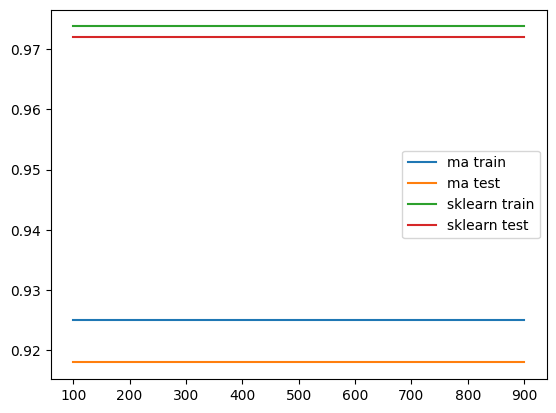

In [70]:
# my_train_acc my_train_acc sklearn_train_acc sklearn_test_acc
plt.plot(range(n_min, n_max, step), my_train_acc, label='ma train')
plt.plot(range(n_min, n_max, step), my_test_acc, label='ma test')
plt.plot(range(n_min, n_max, step), sklearn_train_acc, label='sklearn train')
plt.plot(range(n_min, n_max, step), sklearn_test_acc, label='sklearn test')
plt.legend()
